<a href="https://colab.research.google.com/github/DiegoAlv9423/Taller_3_EDA/blob/main/Taller_3_An%C3%A1lisis_bivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes
## Taller 3 - Actividad Grupal . Comparte tu Análisis bivariado

DIEGO ALVAREZ CARO

CRISTIAN MUÑOZ ASTUDILLO

JULIAN MELENDEZ CRUZ

LORENA TONGUINO

# Contexto y problemática

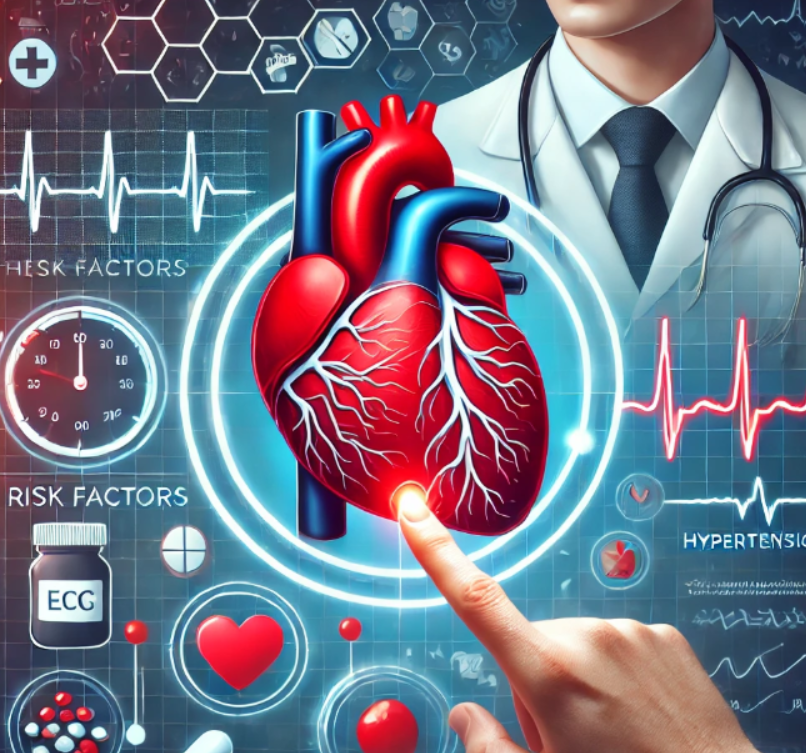

**Enfermedades cardiovasculares**

Las enfermedades cardiovasculares representan una de las principales causas de mortalidad a nivel mundial. Entre los factores de riesgo más estudiados se encuentran la hipertensión, la diabetes, el colesterol elevado y hábitos de vida poco saludables. Sin embargo, dentro del diagnóstico y monitoreo de pacientes con posible enfermedad cardíaca, ciertas mediciones fisiológicas resultan ser importantes.

Uno de estos indicadores es la frecuencia cardíaca máxima alcanzada (MaxHR), la cual refleja la capacidad del corazón para responder al esfuerzo físico. Se ha sugerido que valores anómalos de MaxHR pueden estar asociados con una mayor probabilidad de desarrollar enfermedades cardiovasculares. Adicionalmente, la angina inducida por el ejercicio (ExerciseAngina_Y) es un síntoma importante, ya que su presencia durante el esfuerzo físico puede indicar obstrucciones en las arterias coronarias.

Dado el impacto de estos factores en la salud cardíaca, es relevante analizar si existe una relación significativa entre MaxHR y la presencia de enfermedad cardíaca (HeartDisease). Además, explorar cómo influye ExerciseAngina_Y en esta relación puede aportar información valiosa para el diagnóstico y la prevención de riesgos cardiovasculares.

En este contexto, se llevó a cabo un análisis bivariado utilizando un conjunto de datos que contiene información sobre estas variables. Se realizaron imputaciones de datos para manejar posibles valores ausentes y se aplicaron métodos de visualización para identificar patrones en la relación entre MaxHR, ExerciseAngina_Y y HeartDisease.

A partir de este análisis, se formula la siguiente pregunta de investigación:

# Pregunta SMART

**¿Con qué porcentaje de recall se puede predecir la presencia de enfermedades cardíacas, basados en las variables de máxima frecuencia cardiaca (MaxHR) y la presencia de angina durante el ejercicio (ExerciseAngina_Y)?**

# Descripción de las variables

Age: Edad del paciente [años]

Sex: Sexo del paciente [M: Masculino, F: Femenino]

ChestPainType: Tipo de dolor torácico [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginoso, ASY: Asintomático]

RestingBP: Presión arterial en reposo [mm Hg], mm Hg son milímetros de mercurio.

Cholesterol: Colesterol sérico [mg/dl], mg/dl son miligramos por decilitro

FastingBS: Glucemia en ayunas [1: si el nivel de glucemia en ayunas > 120 mg/dl, 0: de lo contrario]

RestingECG: Resultados del electrocardiograma en reposo [Normal: Normal, ST: presencia de anomalías en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0.05 mV), LVH: indicativo de probalbe o definitiva hipertrofia del ventrículo izquierdo según los criterios de criterios de Estes ( parámetros y puntuaciones utilizados en el análisis del electrocardiograma (ECG) )

MaxHR: Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]

ExerciseAngina: Angina inducida por el ejercicio [Y: Sí, N: No]

Oldpeak: Depresión del segmento ST (oldpeak) [Valor numérico medido en depresión]

ST_Slope: Pendiente del segmento ST en el pico del ejercicio [Up: inclinación ascendente, Flat: plana, Down: inclinación descendente]

HeartDisease: Etiqueta [1: presencia de enfermedad cardíaca, 0: Normal]

In [21]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix



In [3]:
# Cargamos el conjunto de datos
df = pd.read_csv('https://raw.githubusercontent.com/DiegoAlv9423/Taller_3_EDA/refs/heads/main/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Conteo de variable etiqueta
df.HeartDisease.value_counts()

,count
HeartDisease,
1,508
0,410


In [5]:
# Porcentajes de cada valor de la eqtiqueta: 55.33% sí presentó cardiopatía, 44.66% no presentó
df.HeartDisease.value_counts("normalize = True")*100

,proportion
HeartDisease,
1,55.337691
0,44.662309


In [6]:
# Verificamos duplicados
df.duplicated().sum()

np.int64(0)

In [7]:
# Verificamos nulos
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


# Datos nulos

En el dataset no tenemos datos nulos, porque en lugar de datos faltantes se registró cero (0). Esto se identificó observando el dataset, los rangos de valores, gráficos y bibliografía asociada al tema, en el análiss univariado

In [8]:
# Conteo de ceros en las columnas donde el valor no puede ser cero
zero_counts = df[['Cholesterol', 'RestingBP', 'Oldpeak']].apply(lambda x: (x == 0).sum())
zero_counts_df = pd.DataFrame({'Variable': zero_counts.index, 'Cantidad de Ceros': zero_counts.values})
zero_counts_df


,Variable,Cantidad de Ceros
0,Cholesterol,172
1,RestingBP,1
2,Oldpeak,368


In [9]:
# Reemplazar ceros por NaN en las columnas especificadas
for col in ['Cholesterol', 'RestingBP', 'Oldpeak']:
    df[col] = df[col].replace(0, np.nan)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,NaN,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,NaN,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,NaN,Up,0


In [ ]:
# Verificamos nulos nuevamente
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,1
Cholesterol,172
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,368


# Imputación

# Calculando Recall con: datos originales, Imputación con la media, imputación con KNN
El mayor Recall y Accuracy se obtuvo con los datos originales, seguidos de la imputación con la media, y el menor se obtuvo con imputación KNN

In [13]:
# prompt: Crear un pipelines que impute los datos nulos de df, comparando 3 métodos para la imputación: reemplazando con la media,  reemplazando con KNNImputer
# , eliminando las filas con nulos, y evaluando los 3 métodos de imputación con el score de un modelo Decision Trees. Calcular también el Score del modelo con los datos originales. Estandarizar los datos luego de separar el conjunto de prueba y el conjunto de entrenamiento


# Separar características (X) y etiqueta (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convertir variables categóricas a numéricas (one-hot encoding)
X = pd.get_dummies(X,
                   columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                   drop_first=True)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipelines para cada método de imputación

# Media
pipeline_mean = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier( random_state=42))
])

# KNN
pipeline_knn = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    #('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier( random_state=42))
])


# Datos originales (sin imputación)
pipeline_original = Pipeline([
    #('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier( random_state=42))
])


# Ajustar y evaluar cada pipeline
pipelines = [pipeline_original, pipeline_mean, pipeline_knn]
pipeline_names = ['Original Data','Mean Imputation', 'KNN Imputation']
scores = []
recalls = []

for pipeline, name in zip(pipelines, pipeline_names):
    try:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        score = metrics.accuracy_score(y_test, y_pred)
        scores.append(score)
        recall= recall_score(y_test, y_pred)
        recalls.append(recall)
        print(f'{name}: Accuracy Score = {score:.3f}')
        print(f"{name}:Recall del modelo: {recall:.3f}")
    except Exception as e:
        print(f'{name}: Error - {e}')


Original Data: Accuracy Score = 0.772
Original Data:Recall del modelo: 0.776
Mean Imputation: Accuracy Score = 0.739
Mean Imputation:Recall del modelo: 0.738
KNN Imputation: Accuracy Score = 0.750
KNN Imputation:Recall del modelo: 0.701


# Calculando Recall luego de eliminar las filas con nulos

Eliminando nulos, se obtuvo un accuracy (0.78) y recall (0.74) menor que con datos originales (accuracy: 0.79 - recall: 0.79)

En comparación con el método de imputación con la media, el accuracy eliminando nulos es casi igual. El accuracy con la media fue de 0.77 y el de nulos 0.78. Pero el Recall con el método de la media es mayor (0.76 imputando con la media vs 0.74 eliminando nulos)

In [14]:

# Evaluar modelo, luego de eliminar datos nulos

# Eliminar filas con datos nulos
df_drop= df.copy().dropna()
#df_drop.shape

# Separar características (X) y etiqueta (y) de df_drop (df sin nulos)
X_d = df_drop.drop('HeartDisease', axis=1)
y_d = df_drop['HeartDisease']
#X_d.shape

# Cofificar variables categoricas
X_d = pd.get_dummies(X_d,
                   columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                   drop_first=True)

# Dividir en conjunto de entrenamiento y prueba
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)
pipeline_original.fit(X_train_d, y_train_d)
y_pred_d = pipeline_original.predict(X_test_d)
score_d = metrics.accuracy_score(y_test_d, y_pred_d)
recall_d= recall_score(y_test_d, y_pred_d)
print(f'Accuracy eliminando nulos= {score:.3f}')
print(f'Recall eliminando nulos: {recall:.3f}')


Accuracy eliminando nulos= 0.750
Recall eliminando nulos: 0.701


# Calculando Recall con diferentes iteraciones en MICE

In [16]:
# prompt: Imputar df con mice, conn cuatro números diferentes de iteraciones. Calcular recall y accuracy para un modelo DecisionTreeClassifier


# Lista para almacenar los resultados
results_mice = []

# Iterar con diferentes números de iteraciones para MICE
for n_iter in [2,3,4]:
    # Crear el pipeline con MICE
    pipeline_mice = Pipeline([
        ('imputer', IterativeImputer(max_iter=n_iter, random_state=0)),
        ('model', DecisionTreeClassifier(random_state=42))
    ])

    # Ajustar el modelo con el pipeline de MICE
    pipeline_mice.fit(X_train, y_train)
    y_pred_mice = pipeline_mice.predict(X_test)
    score_mice = metrics.accuracy_score(y_test, y_pred_mice)
    recall_mice = recall_score(y_test, y_pred_mice)

    # Guardar los resultados
    results_mice.append({
        'n_iter': n_iter,
        'Accuracy': score_mice,
        'Recall': recall_mice
    })

    print(f'MICE ({n_iter} iteraciones): Accuracy Score = {score_mice:.3f}')
    print(f'MICE ({n_iter} iteraciones): Recall Score = {recall_mice:.3f}')




MICE (2 iteraciones): Accuracy Score = 0.701
MICE (2 iteraciones): Recall Score = 0.701
MICE (3 iteraciones): Accuracy Score = 0.701
MICE (3 iteraciones): Recall Score = 0.701
MICE (4 iteraciones): Accuracy Score = 0.701
MICE (4 iteraciones): Recall Score = 0.701


El modelo converge con 2 iteraciones. Se podría validar con otro modelo más sensible al cambio en los datos

# Resumen de resultados: Accuracy y Recall con los diferentes métodos de imputación

In [17]:
data = {
    'Método de imputación': ['Original Data', 'Mean Imputation', 'KNN Imputation', 'Eliminando nulos', 'MICE (2 iteraciones)', 'MICE (3 iteraciones)', 'MICE (4 iteraciones)'],
    'Accuracy Score': [0.772, 0.739, 0.750, 0.750, 0.701, 0.701, 0.701],
    'Recall Score': [0.776, 0.738, 0.701, 0.701, 0.701, 0.701, 0.701]
}

df_results = pd.DataFrame(data)
df_results


,Método de imputación,Accuracy Score,Recall Score
0,Original Data,0.772,0.776
1,Mean Imputation,0.739,0.738
2,KNN Imputation,0.750,0.701
3,Eliminando nulos,0.750,0.701
4,MICE (2 iteraciones),0.701,0.701
5,MICE (3 iteraciones),0.701,0.701
6,MICE (4 iteraciones),0.701,0.701


El mayor Accuracy se obtuvo con datos originales (0.772), seguido del obtenido con KNN y eliminando nulos (0.750).

El mayor Recall se obtuvo con datos originales (0.776), seguido del obtenido imputando con la media (0.738).

El Accuracy y Recall de MICE cambian  con las ejecuciones, pero están alrededor de los datos mostrados en la tabla y siempre son menores que los demás métodos

**Se decide imputar con la media, para no perder información, y evitar que los ceros que se encontraron afecten la distribución de los datos. Esperando que el modelo pueda hacer mejores predicciones en datos futuros con valores nulos**

# Datos imputados con la media

Para el análisis, usaremos los datos de df imputados con la media y con las variables categoricas codificadas con One-Hot Encoding

In [18]:
df_original=pd.read_csv('https://raw.githubusercontent.com/DiegoAlv9423/Taller_3_EDA/refs/heads/main/heart.csv')
df_imp_media= df_original.copy()
# Reemplazar ceros en 'Cholesterol', 'RestingBP' y 'Oldpeak' con la mediana de cada columna, ya que no es posible que estas variables sean cero
for i in ['Cholesterol', 'RestingBP', 'Oldpeak']:
    median_value = df_imp_media[i].median()
    df_imp_media.loc[df_imp_media[i] == 0, i] = median_value

# Decodificando df_encoded_media con One-Hot Encoding
df_encoded_media = pd.get_dummies(df_imp_media,
                            columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                            drop_first=True) # Drop first to avoid multicollinearity

df_encoded_media.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.6,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.6,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.6,0,True,False,True,False,True,False,False,False,True


# **Selección de las variables ExerciseAngina_Y y MaxHR y justificación**

Para este análisis seleccinamos las dos variables distintas de mayor correlación

Al incluir las variables categóricas para el cálculo de las corelaciones, encontramos que ST_Slop es la de mayor correlación. Teniendo en cuenta que para abordadrla es necesario abordar tanto ST_Slop_Flat, como ST_Slop_Up, y lo mismo sucede con ChestPainType, en este análisis bivariado, se se selecciona las variables: ExerciseAngina_Y y MaxHR, y se considerann estas variables para un futuro análisis más profundo

## Importancia de las variables

**ExerciseAngina: Angina inducida por el ejercicio** [Y: Sí, N: No]. Se transformó a **ExerciseAngina_Y** [1:sí, 0:no]

Indica presencia (1) de angina (dolor en el pecho) durante una prueba de esfuerzo o actividad física (0 si no lo presenta). Experimentar angina puede ser un signo de enfermedad coronaria o un mayor riesgo de ataque cardíaco.

Referencia de su importancia:

NattionalHeart, Lung, and Blood Institute. Última actualización el27 de diciembre de 2024.Coronary Heart Disease -Symptoms. https://www.nhlbi.nih.gov/health/coronary-heart-disease/symptoms


"La enfermedad coronaria suele desarrollarse a lo largo de muchos años. La placa se acumula y estrecha la arteria coronaria. Es más probable que tenga síntomas como dolor en el pecho, dificultad para respirar o dolor de cuello cuando se esfuerza. Los síntomas suelen desaparecer con el descanso y vuelven cuando está activo o bajo estrés. Los síntomas pueden empeorar a medida que la placa se sigue acumulando."


 **MaxHR (frecuencia cardíaca máxima alcanzada (Maximum Heart Rate)):**

 Variable elegida para el análisis univariado. Recordemos que:

 La Frecuencia cardíaca (FC) muy baja durante el ejercicio puede indicar problemas de conducción eléctrica o insuficiencia cardíaca.

Frecuencia cardíaca (FC) excesivamente alta puede estar asociada con arritmias o estrés excesivo en el corazón.

Referncias de estudios:
 Vázquez et al., 2023, FRECUENCIA CARDIACA: Una revisión sistemática, *Enfermeria en Cardiologia*, 30(90), DOI: https://doi.org/10.59322/90.7186.LR5

 Biasco et al.,2023, Valor pronóstico de las frecuencias cardiacas bajas en pacientes ingresados con infarto agudo de miocardio, *Revista Española de Cardiología*, 76(8), https://doi.org/10.1016/j.recesp.2023.01.008:


# Correlación

In [ ]:
correlation_matrix_pearson = df_encoded_media.corr()['HeartDisease'].sort_values(ascending=False)
correlation_matrix_pearson.round(2)


,HeartDisease
HeartDisease,1.00
ST_Slope_Flat,0.55
ExerciseAngina_Y,0.49
Oldpeak,0.37
Sex_M,0.31
Age,0.28
FastingBS,0.27
RestingBP,0.12
RestingECG_ST,0.10
Cholesterol,0.04


Con pearson las dos variables de mayor correlación que no son categóricas: MaxHR (-0.4) y ExerciseAngina_Y (0.49)

In [ ]:
correlation_matrix_kendall = df_encoded_media.corr('kendall')['HeartDisease'].sort_values(ascending=False)
correlation_matrix_kendall.round(2)

,HeartDisease
HeartDisease,1.00
ST_Slope_Flat,0.55
ExerciseAngina_Y,0.49
Oldpeak,0.37
Sex_M,0.31
FastingBS,0.27
Age,0.24
RestingECG_ST,0.10
RestingBP,0.10
Cholesterol,0.04


Con kendall las dos variables de mayor correlación que no son categóricas: MaxHR (-0.33) y ExerciseAngina_Y (0.49)

In [ ]:
correlation_matrix_spearman = df_encoded_media.corr('spearman')['HeartDisease'].sort_values(ascending=False)
correlation_matrix_spearman.round(2)

,HeartDisease
HeartDisease,1.00
ST_Slope_Flat,0.55
ExerciseAngina_Y,0.49
Oldpeak,0.42
Sex_M,0.31
Age,0.29
FastingBS,0.27
RestingBP,0.12
RestingECG_ST,0.10
Cholesterol,0.05


Con spearman las dos variables de mayor correlación que no son categóricas: MaxHR (-0.4) y ExerciseAngina_Y (0.49)

## Relación entre las variables ExerciseAngina_Y y MaxHR



### Estadísticos

In [ ]:
estad_ExerciseAngina_Y = df_encoded_media['ExerciseAngina_Y'].describe()
estad_ExerciseAngina_Y



,ExerciseAngina_Y
count,918
unique,2
top,False
freq,547


In [ ]:
estad_MaxHR = df_encoded_media['MaxHR'].describe()
estad_MaxHR

,MaxHR
count,918.000000
mean,136.809368
std,25.460334
min,60.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


La media de MAXHR es 136.81 y la moda de ExerciseAngina_Y es False (se repite 547 veces)

### Correlación

In [ ]:
# Correlación entre ExerciseAngina_Y y MaxHR

corr_M_E = df_encoded_media['ExerciseAngina_Y'].corr(df_encoded_media['MaxHR'])
print(f"La correlación entre ExerciseAngina_Y y MaxHR es: {corr_M_E}")


La correlación entre ExerciseAngina_Y y MaxHR es: -0.370424867226495


### Tabla de contingencia

In [ ]:
# prompt: definr rangos para MaxHR y crear tabla de contigencia con las variables ExerciseAngina_Y y MaxHR de df_encoded_media,

import pandas as pd
# Define ranges for MaxHR
max_hr_ranges = pd.cut(df_encoded_media['MaxHR'], bins=[70, 100, 130, 160, 200], labels=['70-100', '101-130', '131-160', '161-200'])

# Create the contingency table
contingency_table = pd.crosstab(df_encoded_media['ExerciseAngina_Y'], max_hr_ranges)

# Display the table
contingency_table


MaxHR,70-100,101-130,131-160,161-200
ExerciseAngina_Y,,,,
False,36,115,231,160
True,44,194,117,15


**Según la tabla de contigencia:**

La mayor proporción de personas que no presentaron angina (231 personas), se encuentra en un rango de frecuencias cardiacas entre 131 y 160

La mayor proporción de personas que sí presentaron angina (194 personas), se encuentra en un rango de frecuencias cardiacas entre 101 y 130

Para frecuencias observadas entre 70 y 130, son más las personas que sí presentaron angina, que las que no la presentaron

Para frecuencias observadas entre 131 y 200, son más las personas que no presentaron angina, que las que sí la presentaron

Esto explica la correlación negativa: aumenta MaxHR y disminuye la proporción de personas que presentan angina

Tiene sentido que las personas que presentan angina no puedan alcanzar frecuencias cardiacas más altas, no resisten el esfuerzo

Según la correlación la relación es negativa y moderada

# Diagrama de dispersión de datos

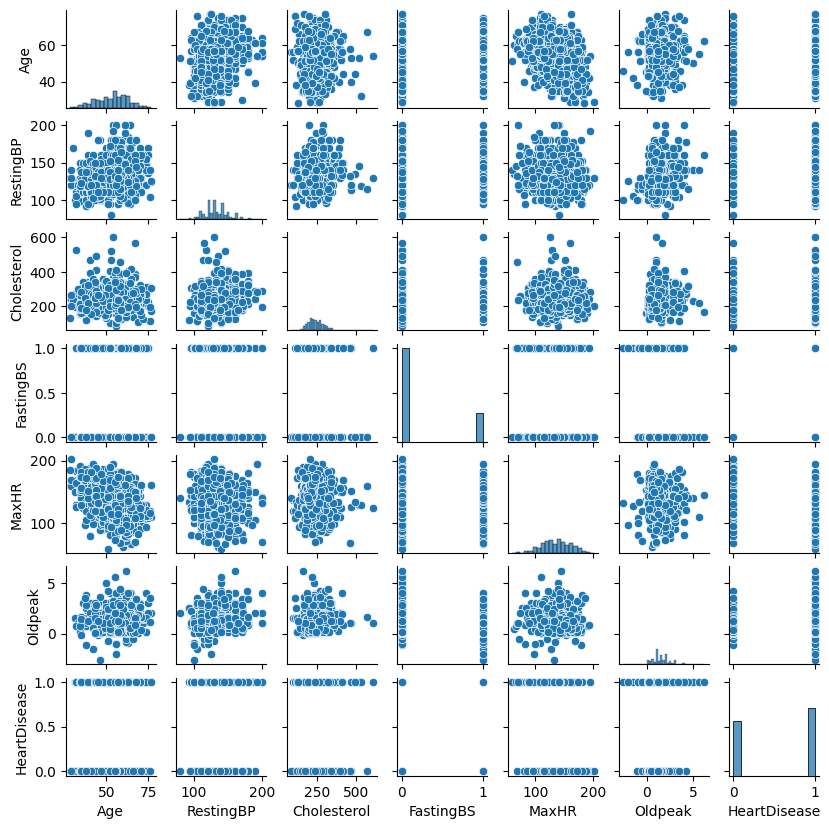

<Figure size 800x800 with 0 Axes>

In [ ]:
# distribucion datos
sns.pairplot(df, height=1.2)
plt.figure(figsize=(8,8))
plt.show()

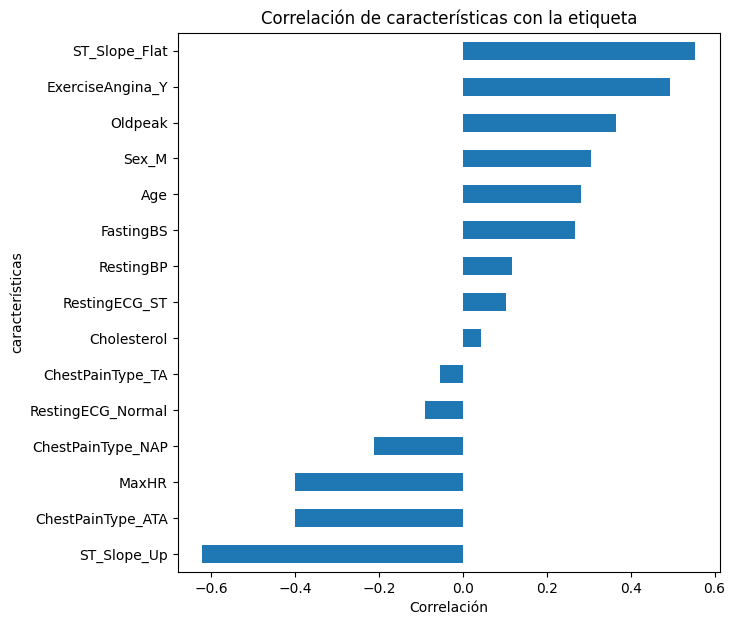

In [ ]:
# correlacion de las variables independinetes con la etiqueta
X = df_encoded_media.drop('HeartDisease', axis=1)
y = df_encoded_media['HeartDisease']

corr = X.corrwith(y)
corr_y = corr.sort_values(ascending=True)

corr = df_encoded_media.corr()
corr_y = corr['HeartDisease'].sort_values(ascending=True)
corr_y = corr_y.drop('HeartDisease')
#print(corr_y)

plt.figure(figsize=(7, 7))
corr_y.plot(kind='barh')
plt.title('Correlación de características con la etiqueta')
plt.xlabel('Correlación')
plt.ylabel('características')
plt.show()

# Definimos umbral de correlación para el nuevo data set

In [ ]:
features_selected = corr_y[abs(corr_y) > 0.4].index
df_encoded_media_04 = df_encoded_media[features_selected.tolist() + ['HeartDisease']]
df_encoded_media_04.head()

,ST_Slope_Up,ChestPainType_ATA,MaxHR,ExerciseAngina_Y,ST_Slope_Flat,HeartDisease
0,True,True,172,False,False,0
1,False,False,156,False,True,1
2,True,True,98,False,False,0
3,False,False,108,True,True,1
4,True,False,122,False,False,0


# Distribuciones numéricas para dataframe imputado con la mediana

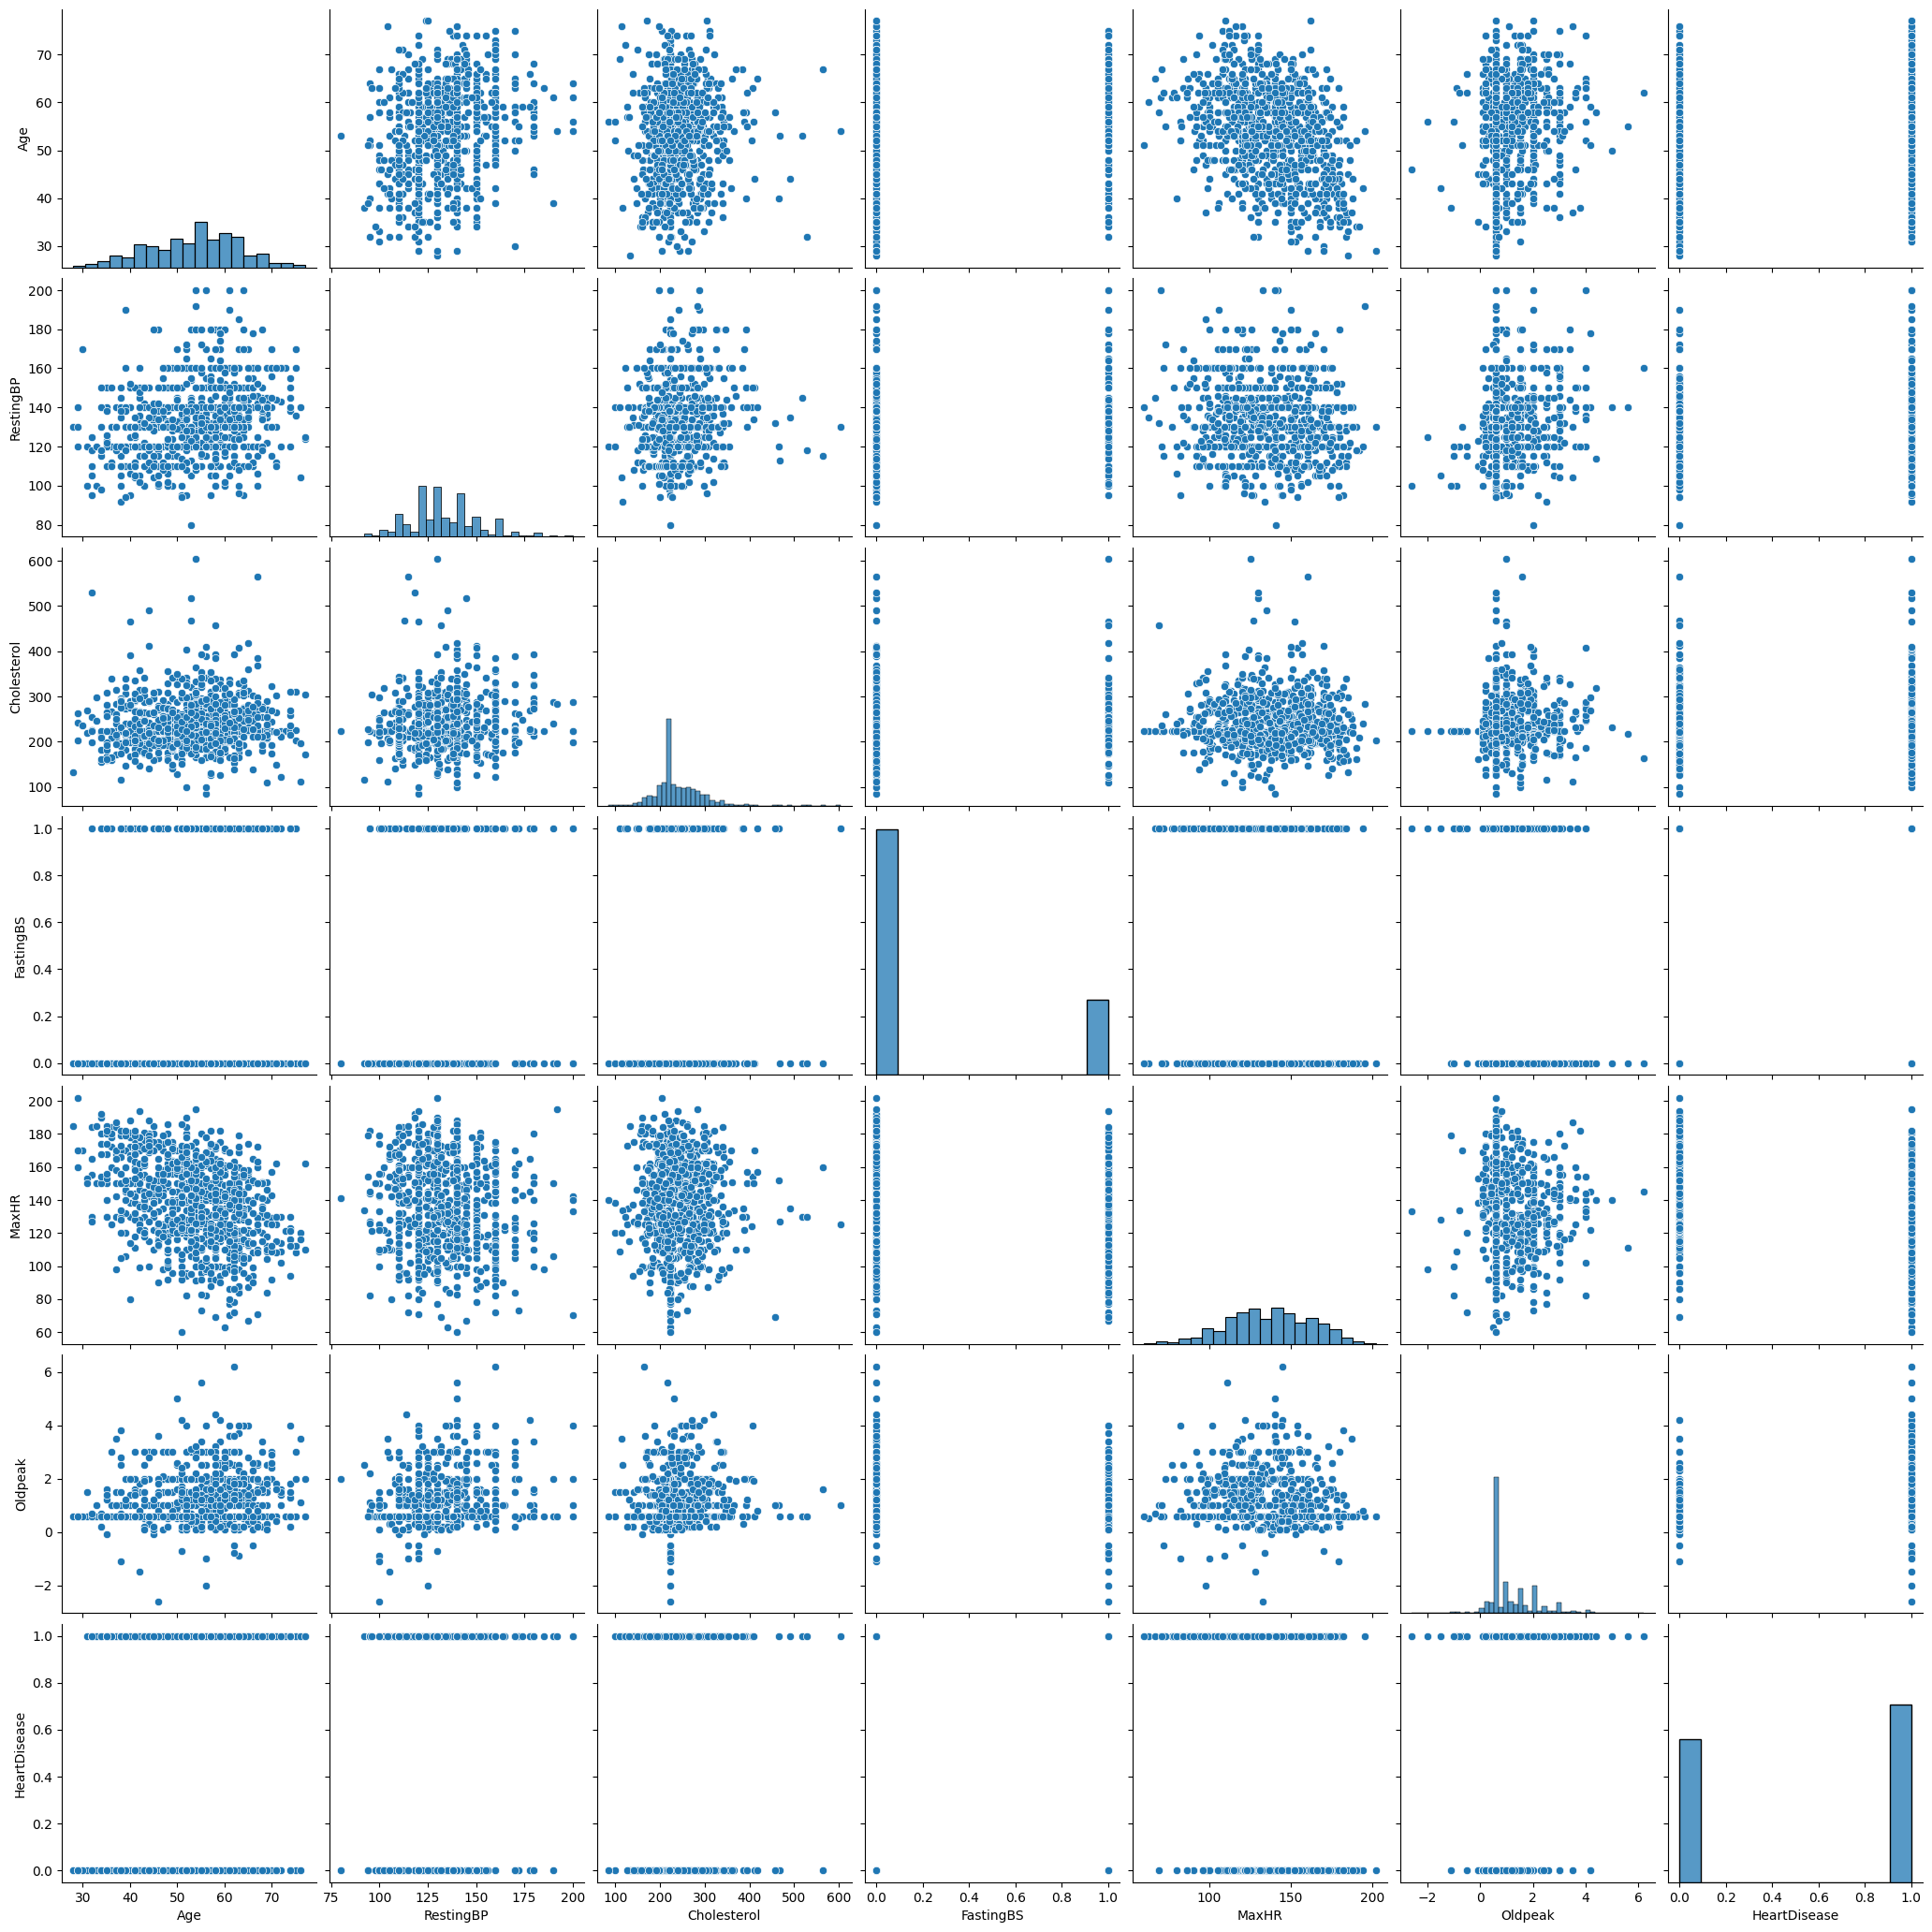

<Figure size 800x800 with 0 Axes>

In [ ]:
df_numeric = df_encoded_media.select_dtypes(include=['number'])

sns.pairplot(df_numeric, height=3)
plt.figure(figsize=(8,8))
plt.show()

# Normalizar

In [ ]:
# las variables a usar son MaxHR y OldPeak
# Nuevo DF solo con los dos predictores
data = df_imp_median[['MaxHR'] + ['Oldpeak'] + ['HeartDisease']]

# Normalizando
X1 = data[['MaxHR']]/data['MaxHR'].max()
X2 = data[['Oldpeak']]/data['Oldpeak'].max()
y = data['HeartDisease']
data = pd.concat([X1, X2, y], axis=1)


NameError: name 'df_imp_median' is not defined

In [ ]:
# dispersión de los datos
corr = data.corr()
print(corr)
sns.pairplot(data, height=3)
plt.figure(figsize=(5,5))
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data, orient="h")
plt.title("Diagramas de Cajas y Bigotes")
plt.show()

In [ ]:
# Histograma y boxplot para visualizar la distribución
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data["MaxHR"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribución de MaxHR")
axes[0].set_xlabel("MaxHR")
axes[0].set_ylabel("Frecuencia")

sns.boxplot(x=data["MaxHR"], ax=axes[1], color="orange")
axes[1].set_title("Boxplot de MaxHR")
axes[1].set_xlabel("MaxHR")

plt.tight_layout()
plt.show()

data["MaxHR"].describe()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data["Oldpeak"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribución de Oldpeak")
axes[0].set_xlabel("Oldpeak")
axes[0].set_ylabel("Frecuencia")

sns.boxplot(x=data["Oldpeak"], ax=axes[1], color="orange")
axes[1].set_title("Boxplot de Oldpeak")
axes[1].set_xlabel("Oldpeak")

plt.tight_layout()
plt.show()

data["Oldpeak"].describe()

In [ ]:
medias = data.mean()
medianas = data.median()
modas = data.mode().iloc[0]

print("Media:\n", medias)
print("\nMediana:\n", medianas)
print("\nModa:\n", modas)

In [ ]:
# Heatmap variables numéricas

import matplotlib.pyplot as plt
import seaborn as sns

#Eligiendo sólo las variables numéricas
df_numericas = df_encoded_media.select_dtypes(include=['int64', 'float64'])

#Matrices de correlación de Pearson y Spearman
correlation_matrix_pearson = df_numericas.corr(method='pearson')
correlation_matrix_spearman = df_numericas.corr(method='spearman')

# Heatmap correlación de Pearson
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap correlación de Pearson')
plt.show()

# Heatmap correlación de Spearman
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap correlación de Spearman ')
plt.show()

# Interpretación heatmaps

Se presentan los heatmaps de Pearson y Spearman. Consideramos que los resultados de Spearman pueden ser más adecuados para analizar pues esta correlación no se basa en el supuesto de relación lineal entre las variables. Sin embargo, se presentan los de Pearson a modo de comparación, pues si las correlaciones son similares comparando entre métodos, esto podría sugerir que la relación entre las variables sí es lineal, lo cual es importante a la hora de considerar una regresión lineal de las variables.

Los heatmaps de Pearson y Spearman son similares a la hora de calcular las correlaciones de las variables, indicando que se puede esperar que las relaciones entre las variables sean lineales. La correlación que más cambia es entre las enfermedades del corazón (HeartDisease) y Oldpeak (0.37 con Pearson, y 0.42 con Spearman). De acuerdo a esto podríamos esperar que no haya una relación lineal entre las variables de HeartDisease y Oldpeak, lo cual es importante considerar para hacer regresiones lineales.

Finalmente, no hay relaciones lineales fuertes entre las variables, por lo que a priori no esperamos problemas de colinealidad en un futuro modelo de regresión lineal

In [ ]:
#Stacked chart para comparar categóricas con HeartDisease
df = pd.read_csv('https://raw.githubusercontent.com/DiegoAlv9423/Taller_3_EDA/refs/heads/main/heart.csv')
df_categoricas = df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']]

for col in df_categoricas.columns:
  if col != 'HeartDisease':
    plt.figure(figsize=(8, 6))
    pd.crosstab(df_categoricas[col], df_categoricas['HeartDisease']).plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar plot of {col} vs. HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='HeartDisease')
    plt.show()


# Análisis variables categóricas

Con el stacked bar chart podemos ver las frecuencias de cada una de las categorías de las variables y cuántas observaciones de cada categoría tienen o no enfermedades cardíacas, permitiendo que observemos posibles relaciones entre las variables categóricas y las enfermedades cardíacas, las cuales pueden usarse en futuros análisis de clasificación para predecir si una persona sufre del corazón o no.

En esta base de datos vemos que hay un porcentaje mayor de hombres que mujeres, y que los hombres además son más propensos a enfermedades cardiacas porque la zona naranja (sí tienen enfermedades cardíacas) es más grande que la zona azul (no tienen enfermedades cardíacas). También vemos cantidad mayor de personas asintomáticas de dolor en el pecho y que estas tienen una gran proporción de personas con enfermedades cardíacas, igualmente para quienes tienen angina del pecho al realizar ejercicio. Finalmente, quienes muestran un electrocardiograma con una pendiente hacia abajo o plana parece que tienden a tener más enfermedades cardíacas que aquellos con la pendiente hacia arriba, lo cual es esperado desde la teoría médica donde se espera que un electrocardiograma que tiende hacia arriba es de una persona sana, mientras una pendiente plana o hacia abajo indican una alerta de enfermedades cardíacas.

In [22]:

# Lista de subconjuntos de variables a evaluar
model_variants = {
    "Modelo_1": ['MaxHR', 'ExerciseAngina_Y'],  # Menos variables
    "Modelo_2": ['MaxHR', 'ExerciseAngina_Y', 'Oldpeak'],  # Variables intermedias
    "Modelo_3": ['MaxHR', 'ExerciseAngina_Y', 'Oldpeak', 'Cholesterol'],  # Variables intermedias
    "Modelo_4": ['MaxHR', 'ExerciseAngina_Y', 'Oldpeak', 'Cholesterol', 'Age'],  # Más variables
    "Modelo_5": ['MaxHR', 'ExerciseAngina_Y', 'Oldpeak', 'Cholesterol', 'Age', 'RestingBP'],  # Todas las variables
}
# Codificando variable a (True=1, False=0)
df_encoded_media['ExerciseAngina_Y'] = df_encoded_media['ExerciseAngina_Y'].astype(int)
# Diccionario para almacenar resultados
results_recall = []
results_accuracy = []
# Iterar sobre los diferentes modelos con sus conjuntos de variables
for model_name, variables in model_variants.items():
    print(f"\nEntrenando {model_name} con variables: {variables}")

    # Definir las variables predictoras (X) y la variable objetivo (y)
    X = df_encoded_media[variables]
    y = df_encoded_media['HeartDisease']

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear el pipeline de preprocesamiento y modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logistic_regression', LogisticRegression())
    ])

    # Ajustar el modelo
    pipeline.fit(X_train, y_train)

    # Predecir en los datos de prueba
    y_pred = pipeline.predict(X_test)

    # Calcular el recall
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Guardar los resultados
    results_recall.append({
        "Modelo": model_name,
        "Variables": ", ".join(variables),
        "Recall": recall
    })
    results_accuracy.append({
        "Modelo": model_name,
        "Variables": ", ".join(variables),
        "Accuracy": accuracy
    })

    # Obtener los coeficientes del modelo y su significancia usando statsmodels
    X_train_with_intercept = sm.add_constant(X_train)
    model = sm.Logit(y_train, X_train_with_intercept).fit(disp=0)  # disp=0 para no imprimir detalles
    print(f"Coeficientes de {model_name}:\n{model.summary()}")


    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Accuracy {model_name}: {accuracy}")
    print(f"Recall {model_name}: {recall:.3f}")
    print(f"F1-score {model_name}: {f1}")
    print(f"Confusion Matrix {model_name}:\n{conf_matrix}")

# Convertir resultados a DataFrame y mostrar comparaciones
results_recall_df = pd.DataFrame(results_recall)
results_accuracy_df = pd.DataFrame(results_accuracy)
print("\nComparación de Recall:")
print(results_recall_df)
print("\nComparación de Accuracy:")
print(results_accuracy_df)




Entrenando Modelo_1 con variables: ['MaxHR', 'ExerciseAngina_Y']
Coeficientes de Modelo_1:
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  642
Model:                          Logit   Df Residuals:                      639
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 Mar 2025   Pseudo R-squ.:                  0.2493
Time:                        17:20:27   Log-Likelihood:                -332.83
converged:                       True   LL-Null:                       -443.35
Covariance Type:            nonrobust   LLR p-value:                 1.003e-48
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9080      0.603      4.823      0.000       1.726       4.090
MaxHR               -


# Conclusiones del análisis Bivariado

**¿Respuesta a la pregunta SMART?**

El análisis bivariado permitió explorar la relación entre la frecuencia cardíaca máxima (MaxHR) y la presencia de enfermedad cardíaca (HeartDisease). Mediante el uso de gráficos de dispersión, histogramas y boxplots, se observó que los individuos con enfermedad cardíaca tienden a presentar una frecuencia cardíaca máxima ligeramente inferior en comparación con aquellos sin la enfermedad. No obstante, la variabilidad observada dentro de cada grupo sugiere que esta relación no es del todo concluyente y podría estar influenciada por otros factores.

Adicionalmente, se analizó la variable ExerciseAngina_Y, la cual mostró una distribución diferenciada entre los grupos con y sin enfermedad cardíaca. La mayoría de los individuos sin enfermedad cardíaca no reportaron angina inducida por el ejercicio, mientras que una proporción significativamente mayor de aquellos con la enfermedad sí presentaron este síntoma. Esto indica que ExerciseAngina_Y podría ser un predictor relevante para identificar la presencia de enfermedad cardíaca.

**Sobre la imputación de datos**

La imputación de datos realizada en el análisis no introdujo cambios significativos en la distribución de las variables. Esto se observa en los histogramas y boxplots de MaxHR antes y después de la imputación, donde la forma y dispersión de los datos permanecen prácticamente iguales.

Para MaxHR: La media, mediana y la dispersión general no variaron considerablemente, lo que indica que la imputación mantuvo la estructura original de los datos sin introducir sesgos.

Para ExerciseAngina_Y: La distribución de esta variable categórica también se mantuvo estable, preservando la proporción de sujetos con y sin angina inducida por el ejercicio.

Esto sugiere que la estrategia de imputación utilizada fue adecuada y no alteró la interpretación del análisis. La ausencia de distorsiones en la distribución de los datos después de la imputación respalda la validez de las conclusiones extraídas del análisis bivariado.

**Conclusiones generales**

1. Relación entre MaxHR y HeartDisease: Se observó que las personas con enfermedad cardíaca tienden a tener valores más bajos de MaxHR. Sin embargo, la superposición de valores entre los grupos sugiere que MaxHR por sí sola no es un predictor concluyente de la enfermedad, sino que debe analizarse en conjunto con otras variables.

2. Impacto de ExerciseAngina_Y: La presencia de angina inducida por el ejercicio está más asociada con la presencia de enfermedad cardíaca. Este hallazgo refuerza la importancia de este indicador en evaluaciones médicas.

3. Efectividad de la imputación de datos: No se detectaron alteraciones significativas en la estructura de los datos después de la imputación, lo que sugiere que la técnica utilizada fue apropiada y que los análisis realizados después de la imputación son válidos.

4. Relevancia clínica y analítica: Aunque se identificaron tendencias interesantes, para obtener conclusiones más robustas sería recomendable realizar pruebas estadísticas adicionales y considerar la inclusión de otras variables relevantes. (estámos trabajando en proponer el modelo de predicción, esperamos adjuntarlo a la entrega final)